<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
display(boston_df.head())

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


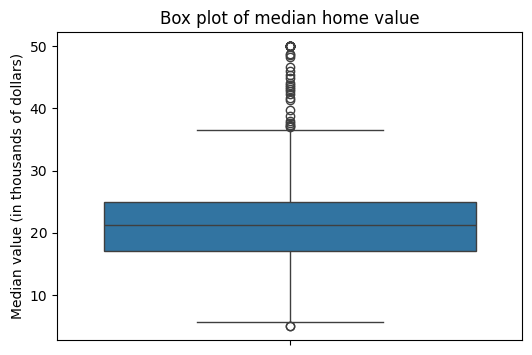

In [10]:
pyplot.figure(figsize=(6, 4))
sns.boxplot(y=boston_df["MEDV"])
pyplot.title("Box plot of median home value")
pyplot.ylabel("Median value (in thousands of dollars)")
pyplot.show()

<ipython-input-13-e35dd27e36b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=boston_df["CHAS"], palette="coolwarm")


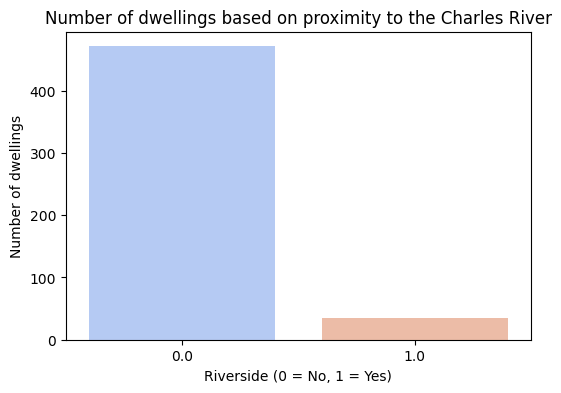

In [13]:
pyplot.figure(figsize=(6, 4))
sns.countplot(x=boston_df["CHAS"], palette="coolwarm")
pyplot.title("Number of dwellings based on proximity to the Charles River")
pyplot.xlabel("Riverside (0 = No, 1 = Yes)")
pyplot.ylabel("Number of dwellings")
pyplot.show()

In [16]:
bins = [0, 35, 70, 100]
labels = ["<= 35 ans", "35-70 ans", "70+ ans"]
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels)

<ipython-input-20-38081197d4c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=boston_df["AGE_group"], y=boston_df["MEDV"], palette="pastel")


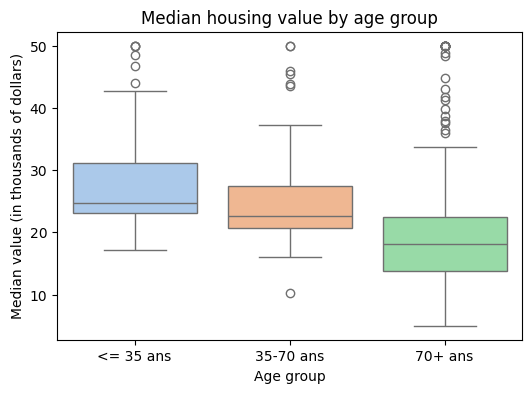

In [20]:
pyplot.figure(figsize=(6, 4))
sns.boxplot(x=boston_df["AGE_group"], y=boston_df["MEDV"], palette="pastel")
pyplot.title("Median housing value by age group")
pyplot.xlabel("Age group")
pyplot.ylabel("Median value (in thousands of dollars)")
pyplot.show()

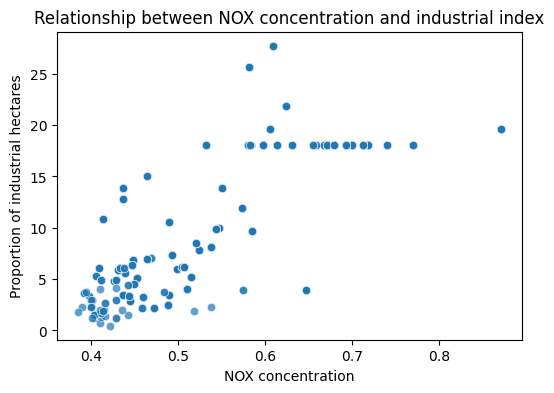

In [22]:
pyplot.figure(figsize=(6, 4))
sns.scatterplot(x=boston_df["NOX"], y=boston_df["INDUS"], alpha=0.7)
pyplot.title("Relationship between NOX concentration and industrial index")
pyplot.xlabel("NOX concentration")
pyplot.ylabel("Proportion of industrial hectares")
pyplot.show()

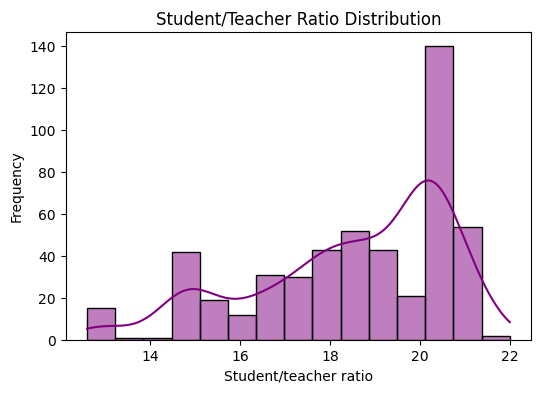

In [24]:
pyplot.figure(figsize=(6, 4))
sns.histplot(boston_df["PTRATIO"], bins=15, kde=True, color="purple")
pyplot.title("Student/Teacher Ratio Distribution")
pyplot.xlabel("Student/teacher ratio")
pyplot.ylabel("Frequency")
pyplot.show()

In [27]:
from scipy.stats import ttest_ind, pearsonr, f_oneway

In [28]:
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = ttest_ind(medv_chas_1, medv_chas_0, equal_var=False)
print(f"Test t : t = {t_stat:.3f}, p = {p_value:.3f}")

Test t : t = 3.113, p = 0.004


In [30]:
medv_groups = [boston_df[boston_df['AGE_group'] == grp]['MEDV'] for grp in ['≤35', '36-70', '≥70']]
F_stat, p_value_anova = f_oneway(*medv_groups)
print(f"ANOVA : F = {F_stat:.3f}, p = {p_value_anova:.3f}")

<ipython-input-30-ffac4b3ab740>:2: DegenerateDataWarning: at least one input has length 0
  F_stat, p_value_anova = f_oneway(*medv_groups)


ANOVA : F = nan, p = nan


In [31]:
corr, p_value_corr = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Corrélation de Pearson : r = {corr:.3f}, p = {p_value_corr:.3f}")

Corrélation de Pearson : r = 0.764, p = 0.000


In [34]:
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        23:01:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0